# ¿Cómo ejecutar un circuito en los dispositivos de IBM?


Para ejecutar este notebook se recomienda ejecutar en local.
## Requisitos

Crear una cuenta en IBM Quantum Computing: https://www.ibm.com/quantum-computing

Copiar el API token, este sera tu `TOKEN` para el ejemplo siguiente.

Ejecutar una sola vez en local (eliminar `#` para ejecutar) con el `TOKEN`: 

In [10]:
#from qiskit import IBMQ 
#IBMQ.save_account(TOKEN)

## Preámbulo

In [11]:
import qiskit as qkt

Crea un circuito, ejemplo:

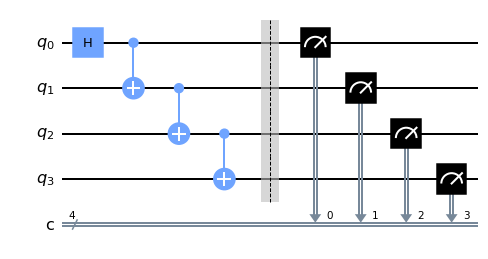

In [21]:
qc=qkt.QuantumCircuit(4,4)
qc.h(0)
qc.cx([0,1,2],[1,2,3])
qc.barrier()

qc.measure(range(4),range(4))
qc.draw('mpl')

Carga tu cuenta de IBM

In [12]:
from qiskit import IBMQ
IBMQ.load_account() #Esto carga tu cuenta
provider = IBMQ.get_provider(hub='ibm-q')  #Escoge el proveedor, por default es 'ibm-q'

Escoge el nombre de un procesador cuántico (los puedes ver en la página de IBM). Ejemplo `ibmq_lima`:

In [14]:
qpu= provider.get_backend('ibmq_lima')

Ejecuta el circuito en el qpu que escogiste y usa `jobmonitor` para saber el estado del sistema

In [ ]:
from qiskit.tools.monitor import job_monitor
rjob=qkt.execute(qc,backend=qpu,shots=100)
job_monitor(rjob)
rresults=rjob.result()

El resto es lo mismo de siempre, extrae los valores una vez ejecutado, ejemplo:

In [ ]:
counts=rresults.get_counts()
print(counts)

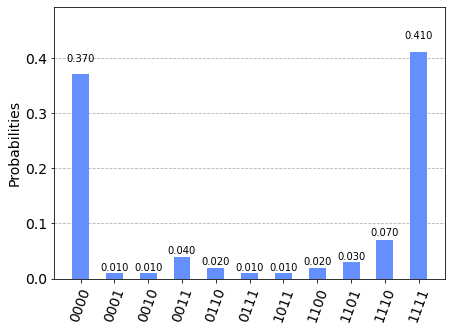

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Siempre puedes volver a la página de IBM y ver tu historial de ejecuciones. Para ejecutar una ejecución pasada, busca en la página de IBM Quantum el id de tu ejecución usando `backend.retrieve_job` incluyendo el id (que puedes encontrar en el historial de IBM Quantum). Ejemplo:

{'0000': 37, '0001': 1, '0010': 1, '0011': 4, '0110': 2, '0111': 1, '1011': 1, '1100': 2, '1101': 3, '1110': 7, '1111': 41}


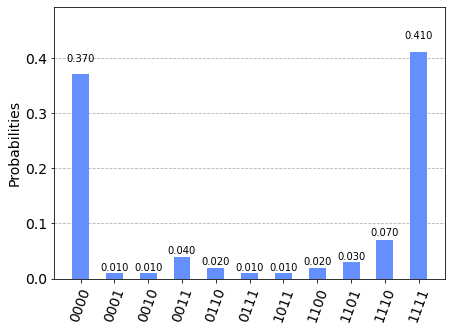

In [19]:
job = provider.backend.retrieve_job('<job_id>')
rresults=rjob.result()
counts=rresults.get_counts()
print(counts)
plot_histogram(counts)

In [35]:
#Por Mauricio Gómez Viloria 2022 para Physics REBoot abril 2022